# Implementation Question 1

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import math 
from scipy import integrate
%matplotlib inline

# defining the signal 

In [2]:
A = 2500 
w_x = 2
w_y = 7
def my_signal(x,y):
    return (A*math.sin(2*math.pi*w_x*x)*math.cos(2*math.pi*w_y*y))

# section a

the mathematically calculated values are:
    horizintal derative energey = 246,749,110
    vertical derative energey = 3,022,566,348
    values range = 5000
see calculations in the dry pdf . 

# section b 

# digitizing the signal into 512*512 image 

we applied a uniform digitization on the signal with parameters below .because there is no bit budget we used the sampled optimal values as the quantized values also . 

In [3]:
delta_x =  0.001953125 
delta_y = 0.001953125 
N_x =int( 1/delta_x ) 
N_y =int( 1/delta_y )
area  = 1/(N_x*N_y)
print("N_x=" + str(N_x) + ", N_y=" + str(N_y))

N_x=512, N_y=512


In [4]:
def double_integral(fun,start_x,end_x,start_y,end_y):
    delta = 0.001
    x_range = end_x - start_x
    y_range = end_y - start_y
    X = int(x_range/delta)
    Y = int(y_range/delta)
    
    integral = 0 
    for i in range(X):
        for j in range(Y):
            integral += fun(i*delta + start_x ,j*delta + start_y)*delta*delta
            
    return integral

In [5]:
#this function calculates the optimal representative in each area 
def optimal_representative(start_x,end_x,start_y,end_y):                   
    result = double_integral(my_signal ,start_x,end_x, start_y,end_y)
    return (1/area)*result

In [6]:
def fill_image(image,Nx,Ny):
    for i in range(Nx):
        for j in range(Ny):
            xi_interval_start = i* delta_x 
            xi_interval_end =  (i+1)*delta_x
            
            yj_interval_start = j*delta_y
            yj_interval_end =  (j+1)*delta_y 
            
            image[i,j]=optimal_representative(xi_interval_start,xi_interval_end,
                                              yj_interval_start,yj_interval_end )

In [7]:
image = np.zeros((N_x,N_y))
fill_image(image,N_x,N_y)

# the final image 

In [8]:
image

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 16.08333952,  16.02403401,  15.84655485, ...,  15.5522109 ,
         15.84655485,  16.02403401],
       [ 32.15699105,  32.03841575,  31.68356433, ...,  31.09505372,
         31.68356433,  32.03841575],
       ...,
       [-48.2112724 , -48.03349874, -47.50148881, ..., -46.61916605,
        -47.50148881, -48.03349874],
       [-32.15699105, -32.03841575, -31.68356433, ..., -31.09505372,
        -31.68356433, -32.03841575],
       [-16.08333952, -16.02403401, -15.84655485, ..., -15.5522109 ,
        -15.84655485, -16.02403401]])

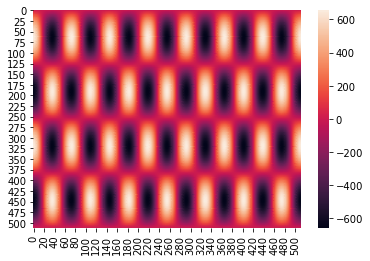

In [9]:
sns.heatmap(image)

Text(0, 0.5, 'x axis')

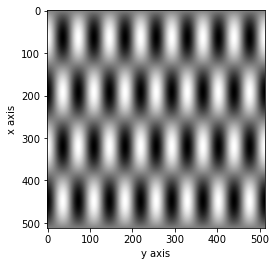

In [10]:
plt.imshow(image, cmap='gray' )
plt.xlabel('y axis')
plt.ylabel('x axis')

#  section c 

In [11]:
def horizontal_derative(fun,x0,y0):
    delta= 0.001 
    return (fun(x0+delta,y0)- fun(x0,y0))/delta

def vertical_derative(fun,x0,y0):
    delta= 0.001 
    return (fun(x0,y0+delta)- fun(x0,y0))/delta

In [12]:
def horizontal_derative_squared(x,y):
    return horizontal_derative(my_signal,x,y)**2

def vertical_derative_squared(x,y):
    return vertical_derative(my_signal,x,y)**2

In [13]:
x_prime_energey = double_integral(horizontal_derative_squared,0,1,0 ,1)

y_prime_energey = double_integral(vertical_derative_squared,0,1,0,1) 

print("horizontal derative energey=" + str(x_prime_energey) + ", vertical derative energey =" + str(y_prime_energey))

horizontal derative energey=246736863.07464564, vertical derative energey =3022079130.8599496


In [15]:
def find_max_min(signal):
    delta = 0.001
    N = int(1/0.001)
    signal_min = math.inf 
    signal_max = -1*math.inf 
    for i in range(N):
        for j in range(N):        
            x= i* delta
            y= i* delta
            signal_value =signal(y,x)
            signal_max=max(signal_max,signal_value)
            signal_min=min(signal_min,signal_value)
    return signal_max , signal_min            

In [16]:
signal_max , signal_min  = find_max_min(my_signal)
value_range = signal_max - signal_min 
print("my signal max= " + str(signal_max) +", my signal min= " + str(signal_min)
     + " , value range = " + str(value_range))

my signal max= 2441.4703628084458, my signal min= -2441.470362808446 , value range = 4882.940725616892


# section d

In [17]:
def MSE_Error(s):
    Nx , Ny , b = s
    mse_total = ((1/(12*(Nx**2)))*x_prime_energey) + ((1/(12*(Ny**2)))*y_prime_energey)+ ((value_range**2)/(12 * (2**(2*b))))
    return mse_total

In [19]:
#without constraint we have to round value_range because it's too big for float
def MSE_Error_BigNumbers(s):
    Nx , Ny , b = s
    mse_total = ((1/(12*(Nx**2)))*x_prime_energey) + ((1/(12*(Ny**2)))*y_prime_energey)+ ((round(value_range)**2)/(12 * (2**(2*b))))
    return mse_total

In [20]:
# importing a method for minimizing our MSE function 
from scipy.optimize import minimize

# calculating the optimum values without constraint  

In [21]:
# the tuple (500,500,10) acts as intial guess for the function
result =  minimize(MSE_Error , (500,500,10) )

<ipython-input-17-2e2bf3b70f66>:3: RuntimeWarning: overflow encountered in double_scalars
  mse_total = ((1/(12*(Nx**2)))*x_prime_energey) + ((1/(12*(Ny**2)))*y_prime_energey)+ ((value_range**2)/(12 * (2**(2*b))))


In [22]:
Nx_optimum , Ny_optimum , b_optimum = result.x 
total_mse = result.fun
print("Not integers and without constraint the optimum values are ,Nx= " + str(Nx_optimum)+ ", Ny= "
    + str(Ny_optimum)+ " ,b= "+str(b_optimum) +" and the Total MSE = " + str(total_mse))

Not integers and without constraint the optimum values are ,Nx= 17319.55059299002, Ny= 186575.11268061935 ,b= 27158.762896527463 and the Total MSE = 0.07578023967295774


In [23]:
# rounding up an down nx,ny,b for finding best integers which will solve the problem
def bestIntegers(nx,ny,b,budget,MSE_func):
    curr_nx = math.floor(nx)
    curr_ny = math.floor(ny)
    curr_b = math.floor(b)
    min_mse= math.inf
    s_return=None,None,None,math.inf
    for i1 in range(2):
        for i2 in range(2):
            for i3 in range(2):
                #print(curr_nx)
                #print(curr_ny)
                #print(curr_b)
                if curr_nx*curr_ny*curr_b <= budget and MSE_func((curr_nx,curr_ny,curr_b))<min_mse:
                    min_mse = MSE_func((curr_nx,curr_ny,curr_b))
                    s_return=(curr_nx,curr_ny,curr_b,min_mse)
                curr_b = math.ceil(b)
            curr_b = math.floor(b)
            curr_ny = math.ceil(ny)
        curr_b = math.floor(b)
        curr_ny = math.floor(ny)
        curr_nx = math.ceil(nx)
    return s_return
                

In [24]:
Nx_optimum, Ny_optimum, b_optimum, total_mse = bestIntegers(Nx_optimum, Ny_optimum, b_optimum,math.inf,MSE_Error_BigNumbers)
print("Integers and without constraint the optimum values are ,Nx= " + str(Nx_optimum)+ ", Ny= "
    + str(Ny_optimum)+ " ,b= "+str(b_optimum) +" and the Total MSE = " + str(total_mse))

Integers and without constraint the optimum values are ,Nx= 17320, Ny= 186576 ,b= 27158 and the Total MSE = 0.07577661376165093


# section e

# miminimize with B low 

In [25]:
B_low = 5000 
#the constraint is the value of the lambda function must equal zero  hence 'eq'
#that way we get the constraint Nx*Ny*b = B low 
cons = ({'type': 'eq', 'fun': lambda x: x[0]*x[1]*x[2] - B_low })
result =  minimize(MSE_Error , (20,25,10) , constraints=cons)

<ipython-input-17-2e2bf3b70f66>:3: RuntimeWarning: divide by zero encountered in double_scalars
  mse_total = ((1/(12*(Nx**2)))*x_prime_energey) + ((1/(12*(Ny**2)))*y_prime_energey)+ ((value_range**2)/(12 * (2**(2*b))))


In [26]:
Nx_optimum , Ny_optimum , b_optimum = result.x 
total_mse = result.fun
print("Not integers and with b low constraint the optimum values are ,Nx= " + str(Nx_optimum)+ ", Ny= "
    + str(Ny_optimum)+ " ,b= "+str(b_optimum) +" and the Total MSE = " + str(total_mse))

Not integers and with b low constraint the optimum values are ,Nx= 20.838042948011402, Ny= 72.92775054906724 ,b= 3.2901845414621143 and the Total MSE = 115467.28140837938


In [27]:
Nx_optimum, Ny_optimum, b_optimum, total_mse = bestIntegers(Nx_optimum, Ny_optimum, b_optimum,B_low,MSE_Error)
print("Integers and with b low constraint the optimum values are ,Nx= " + str(Nx_optimum)+ ", Ny= "
    + str(Ny_optimum)+ " ,b= "+str(b_optimum) +" and the Total MSE = " + str(total_mse))

Integers and with b low constraint the optimum values are ,Nx= 21, Ny= 73 ,b= 3 and the Total MSE = 124928.6018863142


# B high constraint 

In [28]:
B_high = 50000
cons = ({'type': 'eq', 'fun': lambda x: x[0]*x[1]*x[2] - B_high })
result =  minimize(MSE_Error , (100,125,10) , constraints=cons)
Nx_optimum , Ny_optimum , b_optimum = result.x 
total_mse = result.fun
print("No integers and with b low constraint the optimum values are ,Nx= " + str(Nx_optimum)+ ", Ny= "
    + str(Ny_optimum)+ " ,b= "+str(b_optimum) +" and the Total MSE = " + str(total_mse))

No integers and with b low constraint the optimum values are ,Nx= 53.717296398572984, Ny= 187.99659767589853 ,b= 4.951147542425629 and the Total MSE = 16327.619915716523


In [29]:
Nx_optimum, Ny_optimum, b_optimum, total_mse = bestIntegers(Nx_optimum, Ny_optimum, b_optimum,B_high, MSE_Error)
print("Integers and with b low constraint the optimum values are ,Nx= " + str(Nx_optimum)+ ", Ny= "
    + str(Ny_optimum)+ " ,b= "+str(b_optimum) +" and the Total MSE = " + str(total_mse))

Integers and with b low constraint the optimum values are ,Nx= 53, Ny= 188 ,b= 5 and the Total MSE = 16385.582319171117


# section f

In [30]:
def find_optimals(MSE_Error,B):
    #the values below considered very high for the present problem 
    Nx_max =1000
    Ny_max =1000
    b_max=100    
    MSE_min=math.inf
    
    for i in range(1,Nx_max+1):
        for j in range(1,Ny_max+1):
            for z in range(1,b_max+1):
                #applying the Budget constraint 
                if i*j*z == B:
                    curr_error=MSE_Error((i,j,z))
                    #getting the optimal combination
                    if (curr_error<MSE_min):
                        result =(i,j,z,curr_error)
                        MSE_min = curr_error
                            
    return result 

# section g

In [31]:
B_low = 5000
B_high = 50000
result_low =find_optimals(MSE_Error ,B_low)
result_high =find_optimals(MSE_Error,B_high)
print(result_low , result_high)

(25, 50, 4, 141395.64851735736) (50, 200, 5, 16460.91756146465)


# reconstructed images

Text(0, 0.5, 'x axis')

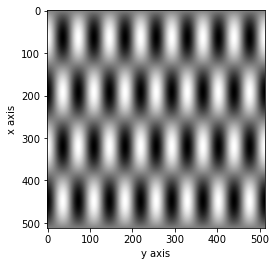

In [32]:
#original image
#the rows are X axis ,colmuns Y axis
plt.imshow(image, cmap='gray' )
plt.xlabel('y axis')
plt.ylabel('x axis')

Text(0, 0.5, 'x axis')

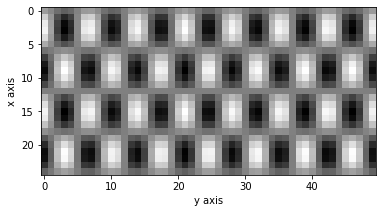

In [33]:
Nx_low , Ny_low , b_low , MSE_low = result_low
#the deltas are used inside the fill_image function
delta_x=1/Nx_low
delta_y=1/Ny_low
image_low = np.zeros((Nx_low,Ny_low))
fill_image(image_low,Nx_low,Ny_low)
plt.imshow(image_low, cmap='gray' )
plt.xlabel('y axis')
plt.ylabel('x axis')

Text(0, 0.5, 'x axis')

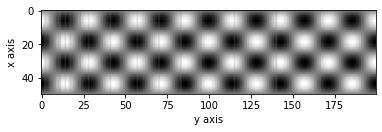

In [34]:
Nx_high , Ny_high , b_high , MSE_high = result_high
#the deltas are used inside the fill_image function
delta_x=1/Nx_high
delta_y=1/Ny_high
image_high = np.zeros((Nx_high,Ny_high))
fill_image(image_high,Nx_high,Ny_high)
plt.imshow(image_high,cmap='gray' )
plt.xlabel('y axis')
plt.ylabel('x axis')

 as excpected we got a higher resolution image in the B high constraint case. 

# section h

# h.a 

# h.b

In [35]:
# my signal 
A = 2500 
w_x = 7
w_y = 2
def my_signal(x,y):
    return (A*math.sin(2*math.pi*w_x*x)*math.cos(2*math.pi*w_y*y))

In [36]:
delta_x =  0.001953125 
delta_y = 0.001953125 
N_x =int( 1/delta_x ) 
N_y =int( 1/delta_y )
area  = 1/(N_x*N_y)
print("N_x=" + str(N_x) + ", N_y=" + str(N_y))

N_x=512, N_y=512


In [37]:
image_h = np.zeros((N_x,N_y))
fill_image(image_h,N_x,N_y)

In [38]:
image_h

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [  56.22812662,   56.21119176,   56.16039738, ...,   56.07577407,
          56.16039738,   56.21119176],
       [ 112.04158342,  112.00783859,  111.90662442, ...,  111.73800189,
         111.90662442,  112.00783859],
       ...,
       [-167.02875868, -166.97845274, -166.82756522, ..., -166.57618702,
        -166.82756522, -166.97845274],
       [-112.04158342, -112.00783859, -111.90662442, ..., -111.73800189,
        -111.90662442, -112.00783859],
       [ -56.22812662,  -56.21119176,  -56.16039738, ...,  -56.07577407,
         -56.16039738,  -56.21119176]])

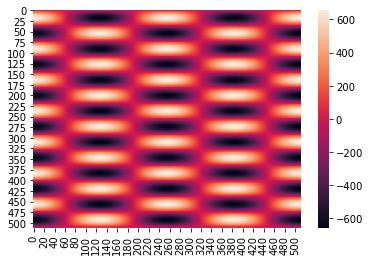

In [39]:
sns.heatmap(image_h)

Text(0, 0.5, 'x axis')

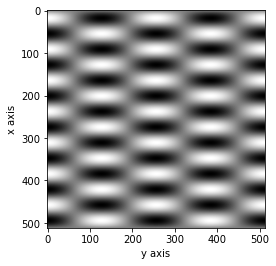

In [40]:
plt.imshow(image_h, cmap='gray' )
plt.xlabel('y axis')
plt.ylabel('x axis')

# h.c

In [41]:
x_prime_energey = double_integral(horizontal_derative_squared,0,1,0 ,1)

y_prime_energey = double_integral(vertical_derative_squared,0,1,0,1) 

print("horizontal derative energey=" + str(x_prime_energey) + ", vertical derative energey =" + str(y_prime_energey) )

horizontal derative energey=3022079130.8598266, vertical derative energey =246736863.0746433


In [42]:
signal_max , signal_min  = find_max_min(my_signal)
value_range = signal_max - signal_min 
print("my signal max= " + str(signal_max) +", my signal min= " + str(signal_min)
     + " , value range = " + str(value_range))

my signal max= 2500.0, my signal min= -2500.0 , value range = 5000.0


# h.d

In [43]:
def MSE_Error(s):
    Nx , Ny , b = s
    mse_total = ((1/(12*(Nx**2)))*x_prime_energey) + ((1/(12*(Ny**2)))*y_prime_energey)+ ((value_range**2)/(12 * (2**(2*b))))
    return mse_total

In [44]:
result =  minimize(MSE_Error , (500,500,10) )
Nx_optimum , Ny_optimum , b_optimum = result.x 
total_mse = result.fun
print("No integers and without constraint the optimum values are ,Nx= " + str(Nx_optimum)+ ", Ny= "
    + str(Ny_optimum)+ " ,b= "+str(b_optimum) +" and the Total MSE = " + str(total_mse))

No integers and without constraint the optimum values are ,Nx= 186754.71028217036, Ny= 17333.660681260535 ,b= 27480.8291026886 and the Total MSE = 0.07565478091871483


<ipython-input-43-2e2bf3b70f66>:3: RuntimeWarning: overflow encountered in double_scalars
  mse_total = ((1/(12*(Nx**2)))*x_prime_energey) + ((1/(12*(Ny**2)))*y_prime_energey)+ ((value_range**2)/(12 * (2**(2*b))))


In [45]:
Nx_optimum, Ny_optimum, b_optimum, total_mse = bestIntegers(Nx_optimum, Ny_optimum, b_optimum,math.inf,MSE_Error_BigNumbers)
print("Integers and without constraint the optimum values are ,Nx= " + str(Nx_optimum)+ ", Ny= "
    + str(Ny_optimum)+ " ,b= "+str(b_optimum) +" and the Total MSE = " + str(total_mse))

Integers and without constraint the optimum values are ,Nx= 186755, Ny= 17334 ,b= 27480 and the Total MSE = 0.07565207930374115


# h.e

In [46]:
B_low = 5000 
#the constraint is the value of the lambda function must equal zero  hence 'eq'
#that way we get the constraint Nx*Ny*b = B low 
cons = ({'type': 'eq', 'fun': lambda x: x[0]*x[1]*x[2] - B_low })
result =  minimize(MSE_Error , (20,25,10) , constraints=cons)
Nx_optimum , Ny_optimum , b_optimum = result.x 
total_mse = result.fun
print("No integers and with b low constraint the optimum values are ,Nx= " + str(Nx_optimum)+ ", Ny= "
    + str(Ny_optimum)+ " ,b= "+str(b_optimum) +" and the Total MSE = " + str(total_mse))

No integers and with b low constraint the optimum values are ,Nx= 72.55190881987761, Ny= 20.730645897255688 ,b= 3.3243621411446744 and the Total MSE = 116451.05047615824


<ipython-input-43-2e2bf3b70f66>:3: RuntimeWarning: divide by zero encountered in double_scalars
  mse_total = ((1/(12*(Nx**2)))*x_prime_energey) + ((1/(12*(Ny**2)))*y_prime_energey)+ ((value_range**2)/(12 * (2**(2*b))))


In [47]:
Nx_optimum, Ny_optimum, b_optimum, total_mse = bestIntegers(Nx_optimum, Ny_optimum, b_optimum,B_low, MSE_Error)
print("Integers and with b low constraint the optimum values are ,Nx= " + str(Nx_optimum)+ ", Ny= "
    + str(Ny_optimum)+ " ,b= "+str(b_optimum) +" and the Total MSE = " + str(total_mse))

Integers and with b low constraint the optimum values are ,Nx= 73, Ny= 21 ,b= 3 and the Total MSE = 126434.96890468679


In [48]:
B_high = 50000
cons = ({'type': 'eq', 'fun': lambda x: x[0]*x[1]*x[2] - B_high })
result =  minimize(MSE_Error , (100,125,10) , constraints=cons)
Nx_optimum , Ny_optimum , b_optimum = result.x 
total_mse = result.fun
print("No integers and with b high constraint the optimum values are ,Nx= " + str(Nx_optimum)+ ", Ny= "
    + str(Ny_optimum)+ " ,b= "+str(b_optimum) +" and the Total MSE = " + str(total_mse))

No integers and with b high constraint the optimum values are ,Nx= 187.35110714045004, Ny= 53.53282624212525 ,b= 4.985326059258542 and the Total MSE = 16425.996822382043


In [49]:
Nx_optimum, Ny_optimum, b_optimum, total_mse = bestIntegers(Nx_optimum, Ny_optimum, b_optimum,B_high, MSE_Error)
print("Integers and with b high constraint the optimum values are ,Nx= " + str(Nx_optimum)+ ", Ny= "
    + str(Ny_optimum)+ " ,b= "+str(b_optimum) +" and the Total MSE = " + str(total_mse))

Integers and with b high constraint the optimum values are ,Nx= 188, Ny= 53 ,b= 5 and the Total MSE = 16479.730257819196


# h.f

# h.g

In [50]:
B_low = 5000
B_high = 50000
result_low =find_optimals(MSE_Error ,B_low)
result_high =find_optimals(MSE_Error,B_high)
print(result_low , result_high)

(50, 25, 4, 141772.24027194668) (200, 50, 5, 16555.06550011275)


# in comparison with previous sections we see that the values of Nx and Ny exhanged in each B constraint due the exchanged frequency between the horizontal and vertical signals , in the horizontal signal we have afaster change of values so we need more sampling in the x axis in order to tame variance in the values and lower the MSE .

Text(0, 0.5, 'x axis')

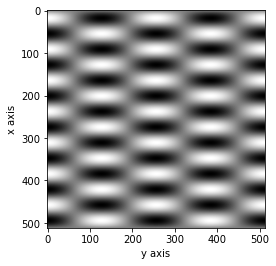

In [51]:
#original image_h
#the rows are X axis ,colmuns Y axis 
plt.imshow(image_h, cmap='gray' )
plt.xlabel('y axis')
plt.ylabel('x axis')

Text(0, 0.5, 'x axis')

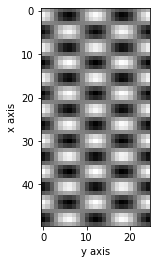

In [52]:
Nx_low , Ny_low , b_low , MSE_low = result_low
#the deltas are used inside the fill_image function
delta_x=1/Nx_low
delta_y=1/Ny_low
image_low = np.zeros((Nx_low,Ny_low))
fill_image(image_low,Nx_low,Ny_low)
plt.imshow(image_low, cmap='gray' )
plt.xlabel('y axis')
plt.ylabel('x axis')

Text(0, 0.5, 'x axis')

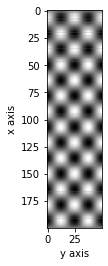

In [53]:
Nx_high , Ny_high , b_high , MSE_high = result_high
#the deltas are used inside the fill_image function
delta_x=1/Nx_high
delta_y=1/Ny_high
image_high = np.zeros((Nx_high,Ny_high))
fill_image(image_high,Nx_high,Ny_high)
plt.imshow(image_high,cmap='gray' )
plt.xlabel('y axis')
plt.ylabel('x axis')